# Importing

In [7]:
# Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [8]:
# Configure API key 

quandl.ApiConfig.api_key = 'x_zrzQURxGssLz5EUsoE'

In [35]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('OECD/HEALTH_PROC_DICDC100_RTOALLNB_USA')

In [36]:
data.head(21)

,Value
Date,
1990-12-31,1735.6
1991-12-31,1706.1
1992-12-31,1612.1
1993-12-31,1522.5
1994-12-31,1587.6
1995-12-31,1509.2
1996-12-31,1604.6
1997-12-31,1571.6
1998-12-31,1707.7


In [37]:
data.shape

(21, 1)

Too little data to subset, data that was available for the USA is very outdated.

Variable: United States, Factors Influencing Health Status And Contact With Health Services, Per 100 000 Population

In [38]:
data.columns

Index(['Value'], dtype='object')

In [39]:
type(data)

pandas.core.frame.DataFrame

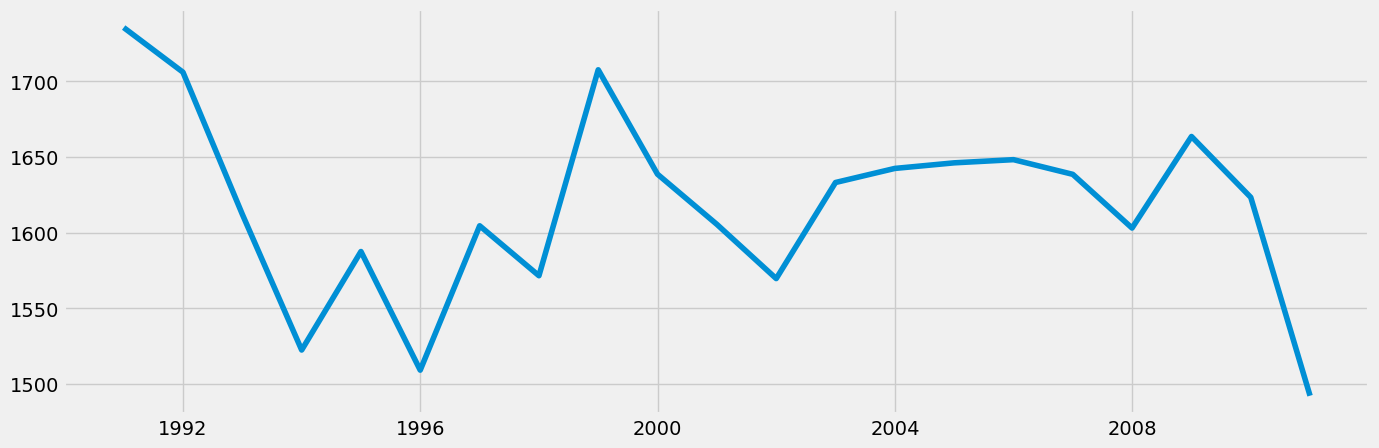

In [40]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

# Time-series analysis: decomposition

In [42]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

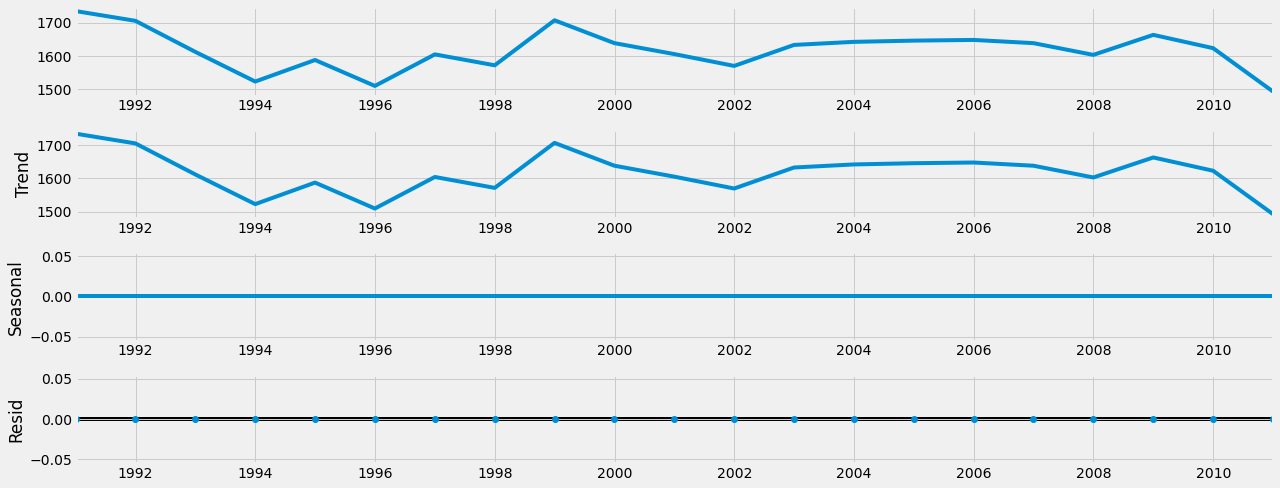

In [44]:
# Plot the separate components

decomposition.plot()
plt.show()

In th bottom most figure, we can see that there is no residual data or 'noise' impacting the trends of the data. We can also clearly see that there is no seasonal factor to the data, due to there being no fluctuation in the seasonality chart. The trends chart does have some fluctuations before the 2000s, with it evening out between the early 2000s up to 2010. Due to the variable regarding health status and availablity of healthcare, we can assume the stability in the chart is due to healthcare becoming more accessible.

# Testing for stationarity

In [45]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.100401
p-value                         0.026524
Number of Lags Used             0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


p-value of less than 0.05, therefore the result is significant. Test statistic is larger than the critical value at 1% significance level, and smaller than the critical value at 5% and 10%. With this we can reject the null hypothesis at 1% but not at 5% and 10%

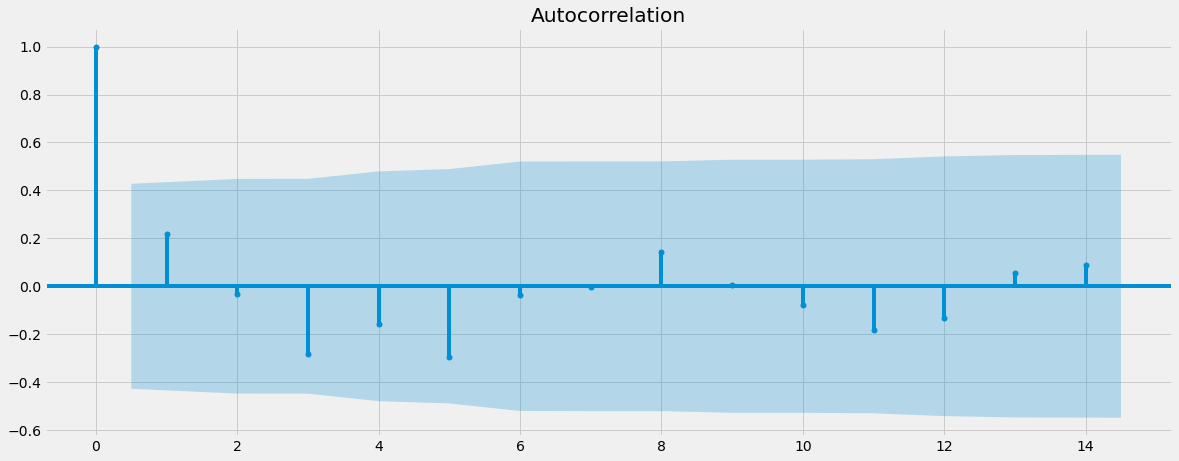

In [46]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

# Stationarizing

In [48]:
data_diff = data - data.shift(1)

In [49]:
data_diff.dropna(inplace = True)

In [50]:
data_diff.head(21)

,Value
Date,
1991-12-31,-29.5
1992-12-31,-94.0
1993-12-31,-89.6
1994-12-31,65.1
1995-12-31,-78.4
1996-12-31,95.4
1997-12-31,-33.0
1998-12-31,136.1
1999-12-31,-69.0


In [51]:
data_diff.columns

Index(['Value'], dtype='object')

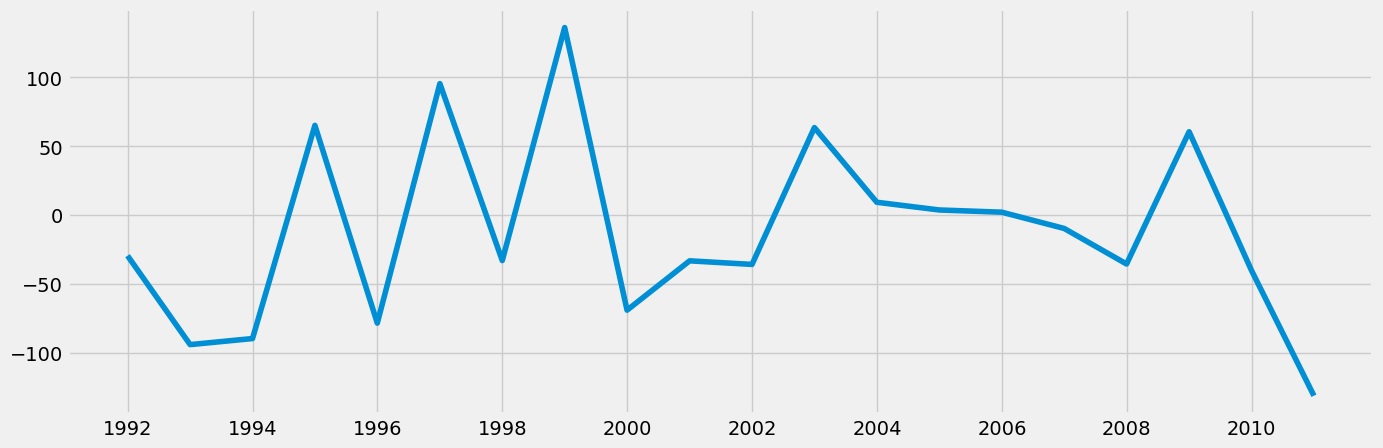

In [52]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [53]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.126373
p-value                         0.000012
Number of Lags Used             0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


The Test statistic is now smalled than all the critical values, therefore we can reject the null hypothesis and the data is deemed stationary

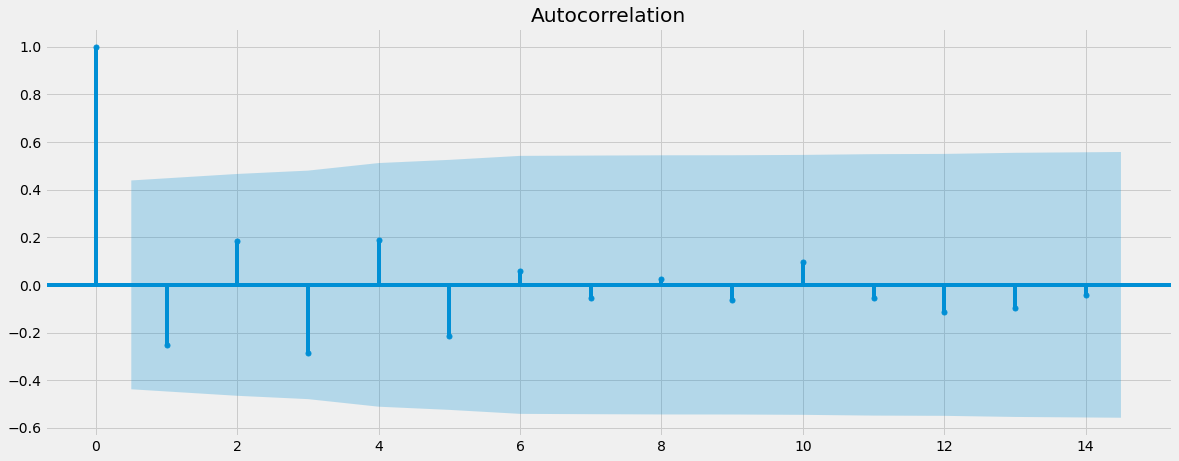

In [54]:
plot_acf(data_diff)
plt.show()